# Belgium Road Signs

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imd
import os
from skimage import transform
from skimage.color import rgb2gray
import random

In [3]:
print(tf.__version__)

1.15.0


## Importar dataset

In [4]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith('.ppm')]
        for f in file_names:
            images.append(imd.imread(f))
            labels.append(int(d))
    
    return images, labels

In [5]:
main_dir = '../datasets/belgian/'
train_data_dir = os.path.join(main_dir, 'Training')
test_data_dir = os.path.join(main_dir, 'Testing')

In [14]:
train_images, train_labels = load_ml_data(train_data_dir)

In [15]:
test_images, test_labels = load_ml_data(train_data_dir)

In [8]:
train_images = np.array(train_images)
test_images = np.array(test_images)

In [9]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [10]:
train_labels.size

4575

In [11]:
test_labels.size

4575

In [12]:
len(set(train_labels))

62

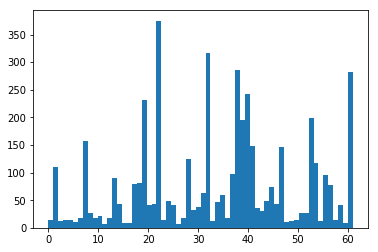

In [19]:
plt.hist(train_labels, len(set(train_labels)))
plt.show()

In [20]:
train_images = [transform.resize(image, (30,30)) for image in train_images]
test_images = [transform.resize(image, (30,30)) for image in test_images]

In [21]:
train_images = np.array(train_images)
test_images = np.array(test_images)

In [22]:
train_images.shape

(4575, 30, 30, 3)

In [23]:
len(train_labels)

4575

## Pre-procese el set de datos
El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

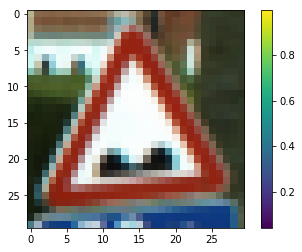

In [24]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
train_images = rgb2gray(train_images)
test_images = rgb2gray(test_images)

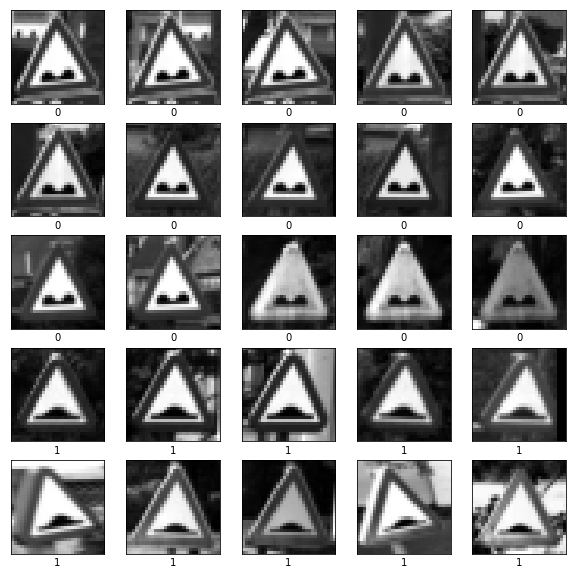

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

## Construir el modelo

### Configurar las Capas¶
Los bloques de construccion basicos de una red neuronal son las capas o layers. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. La mayoria de las capas como tf.keras.layers.Dense, tienen parametros que son aprendidos durante el entrenamiento.

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30, 30)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(62, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


La primera capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capastf.keras.layers.Dense. Estas estan densamente conectadas, o completamente conectadas. La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

### Compile el modelo
Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo
Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos train_images y train_labels.
2. el modelo aprende a asociar imagenes y etiquetas.
3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo test_images. Verifique que las predicciones sean iguales a las etiquetas de el arreglotest_labels.

Para comenzar a entrenar, llame el metodo model.fit, es llamado asi por que fit (ajusta) el modelo a el set de datos de entrenamiento:

In [29]:
model.fit(train_images, train_labels, epochs=20)

Train on 4575 samples
Epoch 1/20
4575/4575 [==============================] - 1s 116us/sample - loss: 2.9230 - acc: 0.3563
Epoch 2/20
4575/4575 [==============================] - 0s 90us/sample - loss: 1.9062 - acc: 0.5814
Epoch 3/20
4575/4575 [==============================] - 0s 87us/sample - loss: 1.4027 - acc: 0.6767
Epoch 4/20
4575/4575 [==============================] - 0s 82us/sample - loss: 1.1199 - acc: 0.7430
Epoch 5/20
4575/4575 [==============================] - 0s 85us/sample - loss: 0.9293 - acc: 0.7864
Epoch 6/20
4575/4575 [==============================] - 0s 87us/sample - loss: 0.8027 - acc: 0.8173
Epoch 7/20
4575/4575 [==============================] - 0s 87us/sample - loss: 0.6934 - acc: 0.8369
Epoch 8/20
4575/4575 [==============================] - 0s 87us/sample - loss: 0.6197 - acc: 0.8511
Epoch 9/20
4575/4575 [==============================] - 0s 84us/sample - loss: 0.5526 - acc: 0.8719
Epoch 10/20
4575/4575 [==============================] - 0s 86us/sample - los

## Evaluar Exactitud
Siguente, compare como el rendimiento del modelo sobre el set de datos:

In [30]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

4575/4575 - 0s - loss: 0.1934 - acc: 0.9609


## Hacer predicciones
Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.

In [31]:
predictions = model.predict(test_images)

In [32]:
predictions[0]

array([9.8927176e-01, 8.7821912e-03, 2.1614238e-11, 6.5963461e-05,
       6.5866296e-08, 4.0739542e-06, 8.0661835e-08, 3.3545947e-11,
       1.5419457e-06, 2.9214879e-09, 1.4891563e-05, 8.3701843e-07,
       4.6748559e-05, 3.6054686e-07, 6.7760675e-07, 8.0174669e-12,
       2.2236344e-07, 7.5740191e-17, 3.1187931e-06, 1.2470461e-05,
       2.7814825e-10, 1.1812910e-09, 3.7916287e-08, 1.3585116e-13,
       1.4419704e-15, 1.4015426e-12, 1.7992264e-18, 1.7738926e-13,
       2.5288109e-08, 1.5207384e-13, 7.4635534e-13, 3.8806852e-16,
       8.4783474e-12, 1.4248891e-10, 5.2715449e-10, 5.3348089e-08,
       1.6986403e-09, 1.2550925e-22, 6.8365212e-06, 2.5308700e-09,
       3.0112033e-09, 8.2784329e-10, 1.6040226e-12, 1.8465921e-12,
       1.7681532e-17, 1.0505968e-11, 2.4038432e-16, 2.5389950e-15,
       3.5839757e-21, 3.2915195e-14, 2.7282671e-17, 2.2251973e-13,
       2.4047764e-18, 2.7295915e-08, 1.0955835e-08, 2.7303071e-10,
       1.9267032e-09, 6.4498511e-12, 8.8847402e-12, 1.7881307e

*una* prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [33]:
np.argmax(predictions[20])

1

In [34]:
test_labels[20]

1

In [35]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(test_labels[predicted_label],
                                100*np.max(predictions_array),
                                test_labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(62))
  plt.yticks([])
  thisplot = plt.bar(range(62), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

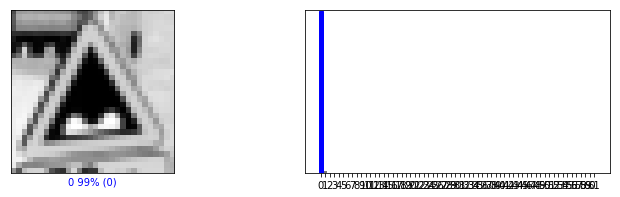

In [36]:
i = 0
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

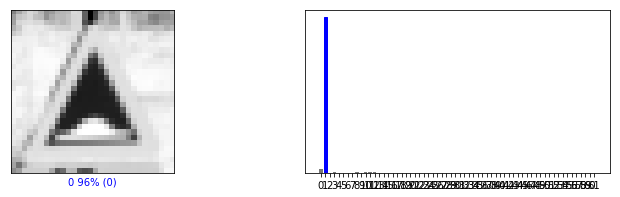

In [37]:
i = 89
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [38]:
rand_signs = random.sample(range(0, len(test_labels)), 15)
rand_signs

[537,
 2850,
 3718,
 194,
 1416,
 3261,
 2437,
 2399,
 4255,
 1432,
 1604,
 1024,
 4518,
 2908,
 807]

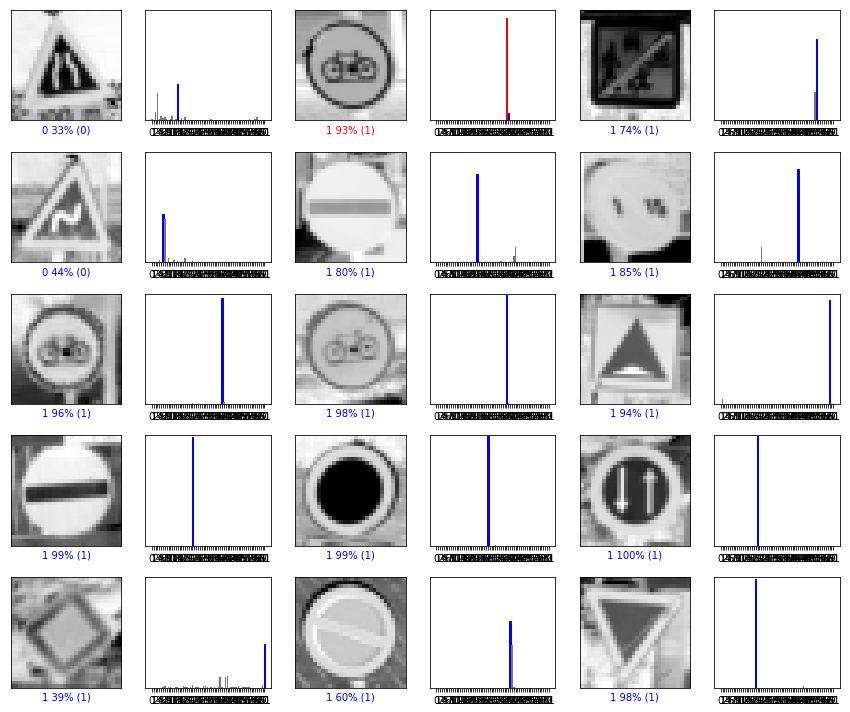

In [39]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(len(rand_signs)):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(rand_signs[i], predictions[rand_signs[i]], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(rand_signs[i], predictions[rand_signs[i]], test_labels)
plt.tight_layout()
plt.show()